## Support vector machines practise

Looking at factors affecting effectivness of social media adverts
Firstly linear classification then non linear

### Linear classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#getting the dataset and creating x and y
#only looking at affect of age and estimated salary in this example

df = pd.read_csv('Social_Network_Ads.csv')
X = df[['Age','EstimatedSalary']]
y = df['Purchased']
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


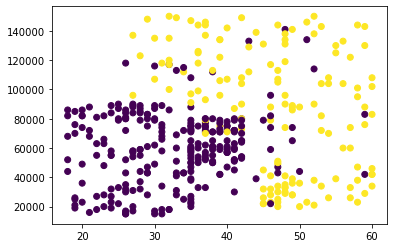

In [10]:
#quick plot
plt.scatter(X.Age,X.EstimatedSalary, c=y)

In [7]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

In [8]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#making the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#predictions
y_pred = classifier.predict(X_test)

In [11]:
#border plotting function
def border(model, ax=None, supp_vect=True):
    if ax is None:
        ax = plt.gca()
    
    #axis delimitation
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #grill creation
    x_grid = np.linspace(xlim[0], xlim[1], 100)
    y_grid = np.linspace(ylim[0], ylim[1], 100)
    xx, yy = np.meshgrid(x_grid, y_grid)
    
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    d = model.decision_function(xy).reshape(xx.shape)
    z = model.predict(xy).reshape(xx.shape)
    
    #show border and margins
    ax.contour(xx, yy, d, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    ax.contourf(xx, yy, z, cmap='plasma', alpha=0.5)
    
    #show support vectors
    if supp_vect:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Text(0.5, 1.0, 'Test set')

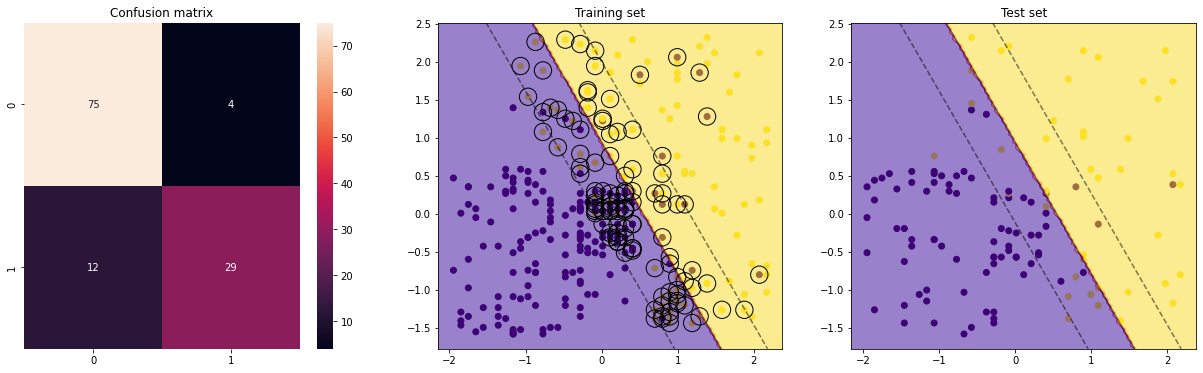

In [12]:
#visualisations
from sklearn.metrics import confusion_matrix

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(21,6))

#confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title('Confusion matrix')

#training set
ax2.scatter(X_train[:,0], X_train[:,1], c=y_train)
border(classifier, ax=ax2)
ax2.set_title('Training set')

#test set 
ax3.scatter(X_test[:,0], X_test[:,1], c=y_test)
border(classifier, ax=ax3, supp_vect=False)
ax3.set_title('Test set')

C:\Users\catri\AppData\Local\Temp\ipykernel_27232\3636394228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.EstimatedSalary = X.EstimatedSalary/10000
C:\Users\catri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\catri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\catri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\catri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have

Text(0.5, 1.0, 'Test set')

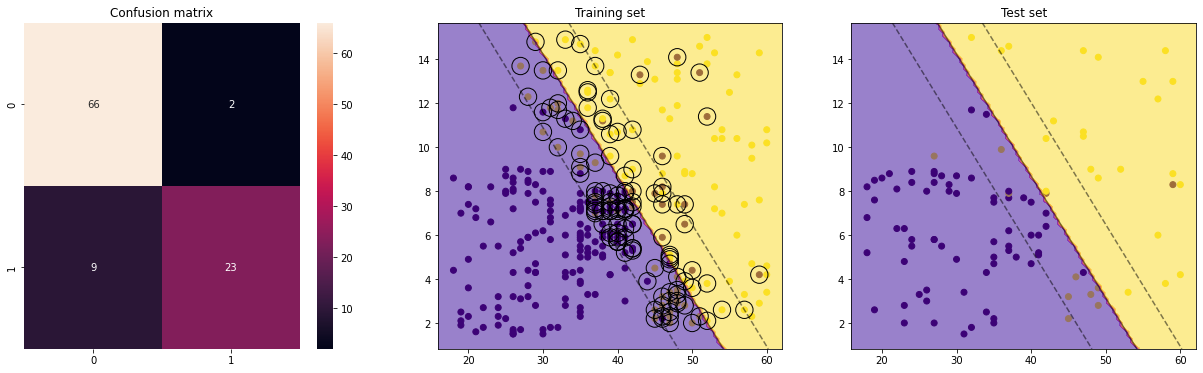

In [13]:
#alternative method where features are reduced to a similar scale
#by dividing salary by 10000

X.EstimatedSalary = X.EstimatedSalary/10000

#new train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#new predictions
y_pred = classifier.predict(X_test)

#new visualisations
from sklearn.metrics import confusion_matrix

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(21,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title('Confusion matrix')

ax2.scatter(X_train.Age, X_train.EstimatedSalary, c=y_train)
border(classifier, ax=ax2)
ax2.set_title('Training set')

ax3.scatter(X_test.Age, X_test.EstimatedSalary, c=y_test)
border(classifier, ax=ax3, supp_vect=False)
ax3.set_title('Test set')

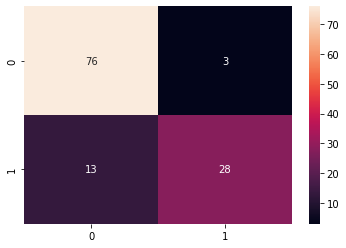

In [15]:
#third version including gender as well

df = pd.read_csv('Social_Network_Ads.csv')
X = pd.concat((df[['Age','EstimatedSalary']],
               pd.get_dummies(df.Gender, drop_first=True)),
              axis=1)
y = df['Purchased']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#predictions
y_pred = classifier.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

### Nonlinear classification

Text(0.5, 1.0, 'Test set')

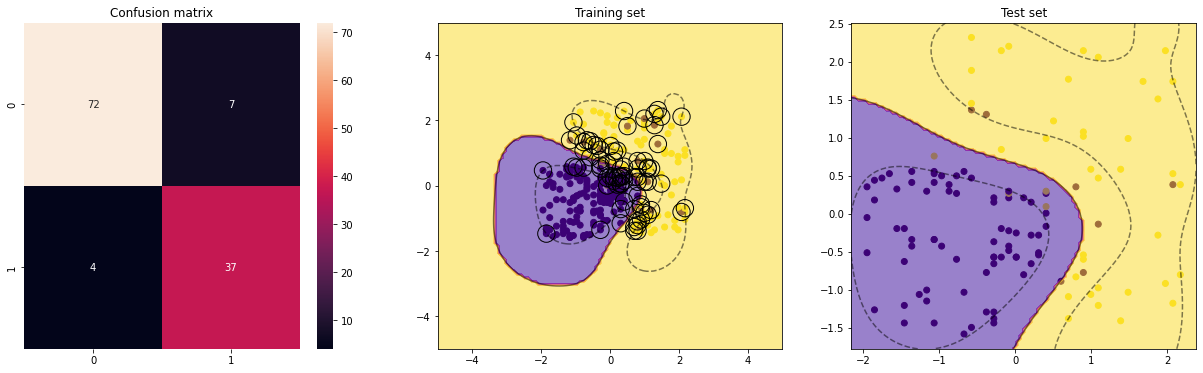

In [16]:
#getting the data - as above starting with only age and estimated salary
df = pd.read_csv('Social_Network_Ads.csv')
X = df[['Age','EstimatedSalary']]
y = df['Purchased']
df.head()

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#model - this time with rbf kernel instead of linear
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

#predictions
y_pred = classifier.predict(X_test)

#confusion matrix
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(21,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title('Confusion matrix')

ax2.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
border(classifier, ax=ax2)
ax2.set_title('Training set')

ax3.scatter(X_test[:,0], X_test[:,1], c=y_test)
border(classifier, ax=ax3, supp_vect=False)
ax3.set_title('Test set')

Text(0.5, 1.0, 'Test set')

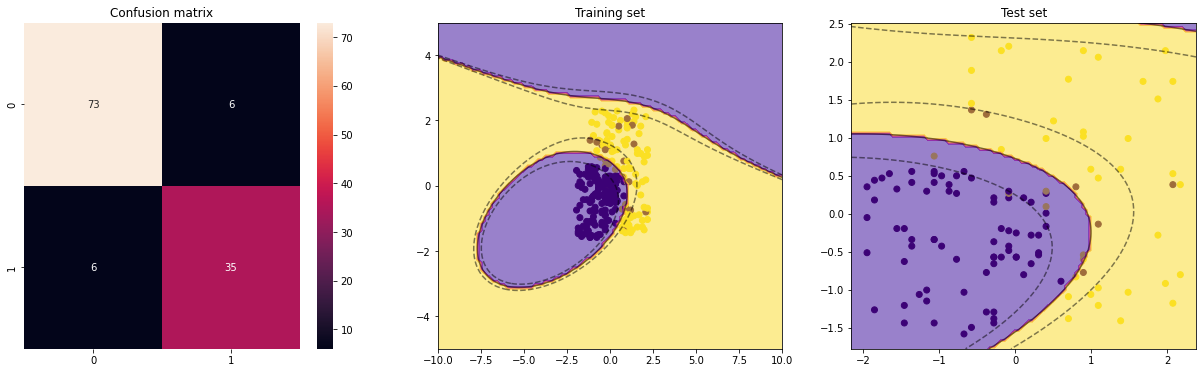

In [17]:
#same again - this time using poly kernal
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#model = kernel = poly
classifier = SVC(kernel = 'poly', degree=3, coef0=1, random_state = 0)
classifier.fit(X_train, y_train)

#predictions
y_pred = classifier.predict(X_test)

#visualisations
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(21,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title('Confusion matrix')

ax2.scatter(X_train[:,0], X_train[:,1], c=y_train)
ax2.set_xlim(-10,10)
ax2.set_ylim(-5,5)
border(classifier, ax=ax2, supp_vect=False)
ax2.set_title('Training set')

ax3.scatter(X_test[:,0], X_test[:,1], c=y_test)
border(classifier, ax=ax3, supp_vect=False)
ax3.set_title('Test set')

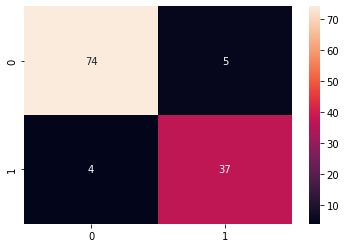

In [18]:
#rbf kernel and including gender

df = pd.read_csv('Social_Network_Ads.csv')
X = pd.concat((df[['Age','EstimatedSalary']],
               pd.get_dummies(df.Gender, drop_first=True)),
              axis=1)
y = df['Purchased']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#model - rbf kernel
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

#predictions
y_pred = classifier.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);